<center><h1>Logistic Regression from scratch using Python</h1></center>

<h2>Introduction: What is Logistic Regression?<br></h2>

**Логістична регресія** – це регресійний аналіз, який передбачає ймовірність результату, який може мати лише два значення. Логістична регресія створює логістичну криву, яка обмежена значеннями від 0 до 1. Логістична регресія моделює ймовірність того, що кожен вхідний матеріал належить до певної категорії.<br><br>

In [30]:
import time  # Імпортуємо бібліотеку для роботи з часом
import warnings  # Імпортуємо бібліотеку для керування попередженнями

import numpy as np  # Імпортуємо бібліотеку для обробки числових масивів
import pandas as pd  # Імпортуємо бібліотеку для роботи з даними у вигляді таблиць
import matplotlib.pyplot as plt  # Імпортуємо бібліотеку для побудови графіків
import plotly as py  # Імпортуємо бібліотеку для інтерактивної візуалізації даних
import plotly.graph_objs as go  # Імпортуємо об'єкти для створення графіків у Plotly

from tqdm import tqdm
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot  # Імпортуємо функції для роботи з Plotly

# Ігноруємо всі попередження виконання програми
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Ініціалізуємо роботу Plotly в режимі блокнота (Notebook mode)
init_notebook_mode(connected=True)

<h2>Logistic Regression</h2>

Теоретично логістична регресія приймає вхідні дані та повертає результат імовірності, значення від 0 до 1. Як це робить логістична регресія? За допомогою функції, яка називається *логістична функція* або більш широко відома як *сигмоїда*. Ця сигмоїдна функція відповідає за *прогнозування* або класифікацію даного вхідного сигналу.

Логістична функція або сигмоїда визначається як:
![](https://imgur.com/Bw5gMJX.jpg)

Де:
* *e* = Число Ейлера, яке є **2.71828**.
* *$x_0$* = значення середньої точки сигмоїди на осі х.
* *L* = максимальне значення.
* *k* = крутизна кривої.

Однак для логістичної регресії тут є визначення логістичної функції:<br>
![](https://imgur.com/903IYoN.jpg)

Де:
* Θ = це вага моделі.

Реалізація на Python:

In [5]:
def sigmoid(X, weight):
    z = np.dot(X, weight)  # Обчислюємо змінну z як добуток вхідних даних та ваг
    return 1 / (1 + np.exp(-z))  # Повертаємо значення сигмоїдної функції для змінної z

Звідси є два поширені способи підходу до оптимізації логістичної регресії. Один – шляхом мінімізації втрат за допомогою **градієнтного спуску (gradient descent)**, а інший – за допомогою **Оцінки максимальної ймовірності (Maximum Likelihood Estimation)**.

<h4>1. Loss minimizing</h4><br>

Вагові коефіцієнти (в нашій нотації представлені тета) є важливою частиною логістичної регресії та інших алгоритмів машинного навчання, і ми хочемо знайти для них найкращі значення. Для початку ми вибираємо випадкові значення, і нам потрібен спосіб виміряти, наскільки добре працює алгоритм за допомогою цих випадкових ваг. Ця міра обчислюється за допомогою функції втрат. <br><br>


Функція втрат визначається як:

![](https://imgur.com/riDHhZS.jpg)

Де:
* $m$ = кількість зразків
* $y$ = цільовий клас

Реалізація на Python:

In [31]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() # Обчислюємо середнє значення втрат за формулою логістичної регресії

Мета полягає в тому, щоб **мінімізувати втрати** за допомогою збільшення або зменшення ваг, що зазвичай називається **підгонкою (fitting)**. Це можна вирішити за допомогою функції під назвою **Градієнтний спуск**. Градієнтний спуск — це просто похідна функції втрат відносно її ваг. Посилання нижче пояснює, як отримують градієнтний спуск:

* [https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step)

![](https://imgur.com/rBVzJbt.jpg)

Вагові коефіцієнти оновлюються шляхом віднімання похідної (градієнтний спуск), помноженої на швидкість навчання, як визначено нижче:

![](https://imgur.com/TAIpnwI.jpg)

Де:
* α = швидкість навчання (learning rate)

Реалізація на Python:

In [7]:
def gradient_descent(X, h, y):
    """
    X (numpy.ndarray): Масив вхідних даних.
    h (numpy.ndarray): Прогнозовані значення моделі.
    y (numpy.ndarray): Реальні значення.
    """
    return np.dot(X.T, (h - y)) / y.shape[0] # Обчислюємо градієнт за формулою градієнтного спуску

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient # Оновлюємо ваги моделі згідно з градієнтом та швидкістю навчання

Отже, так виглядає один з кроків оптимізації LR та **Мінімізації втрат** з використанням градієнтного спуску. Тепер ми переходимо до оцінки максимальної ймовірності.

<h4>2. Maximum likelihood estimation</h4><br>

Одним із кроків до оптимізації логістичної регресії є оцінка ймовірності, мета якої полягає в тому, щоб **максимізувати ймовірність**, щоб ми могли досягти цього за допомогою градієнтного підйому, щоб не помилитися з градієнтним спуском. Градієнтний підйом — це те саме, що градієнтний спуск, за винятком того, що його метою є максимізація функції, а не її мінімізація.<br><br>


Maximum likelihood:

![](https://imgur.com/VCU0TKj.jpg)

$z$ було визначено раніше.

Реалізація на Python:

In [8]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)                      # Обчислюємо змінну z як добуток вхідних даних та ваг
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )  # Обчислюємо логарифмічну правдоподібність за формулою логістичної регресії
    return ll

Тепер градієнт логарифмічної правдоподібності є похідною функції логарифмічної правдоподібності.

![](https://imgur.com/Uvo3rPv.jpg)

Тепер ваги оновлюються шляхом додавання похідної (підйому градієнта), помноженої на швидкість навчання, як визначено нижче:

![](https://imgur.com/hIB0LQ0.jpg)

In [32]:
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)  # Обчислюємо градієнт за формулою градієнтного підйому

def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient  # Оновлюємо ваги моделі згідно з градієнтом та швидкістю навчання

<h2>Python implementation</h2>

**Dataset initialization**

In [34]:
data = pd.read_csv("data/customers_data.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [35]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [36]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [38]:
df = data.copy()

Це багато стовпців, щоб спростити наш експеримент, ми будемо використовувати лише 2 функції **tenure** (Кількість місяців, протягом яких клієнт залишався в компанії) і **MonthlyCharges**, а метою буде **Churn** (відтік клієнтів). Давайте зробимо простий EDA та візуалізуємо наші функції та ціль.

<h3>EDA: Independent variables</h3>

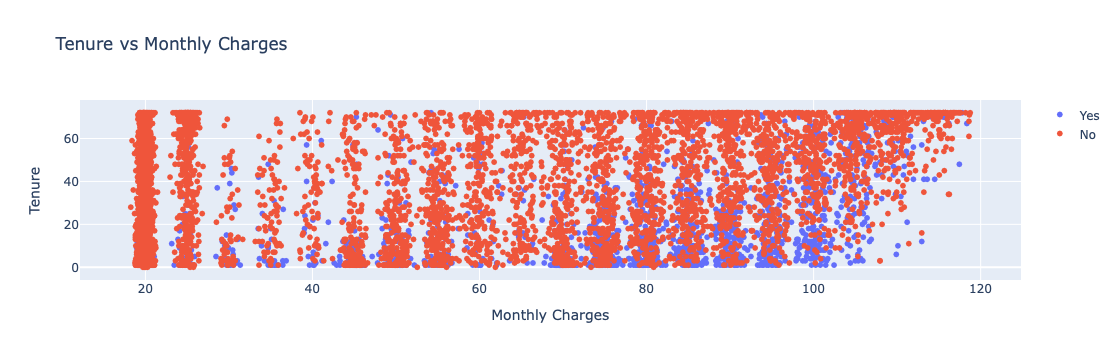

In [39]:
churns = ["Yes", "No"]

fig = {
    'data': [
        {
            'x': df.loc[(df['Churn']==churn), 'MonthlyCharges'] ,
            'y': df.loc[(df['Churn']==churn),'tenure'],
            'name': churn, 'mode': 'markers',
        } for churn in churns
    ],
    'layout': {
        'title': 'Tenure vs Monthly Charges',
        'xaxis': {'title': 'Monthly Charges'},
        'yaxis': {'title': "Tenure"}
    }
}

py.offline.iplot(fig)

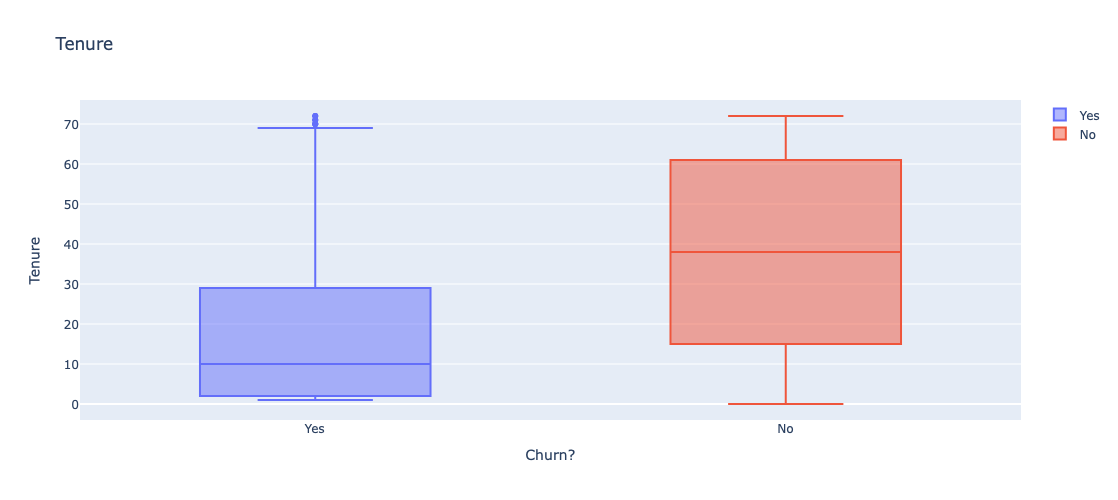

In [40]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'tenure'],
            name = churn
        )
    )

layout = go.Layout(
    title = "Tenure",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "Tenure"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

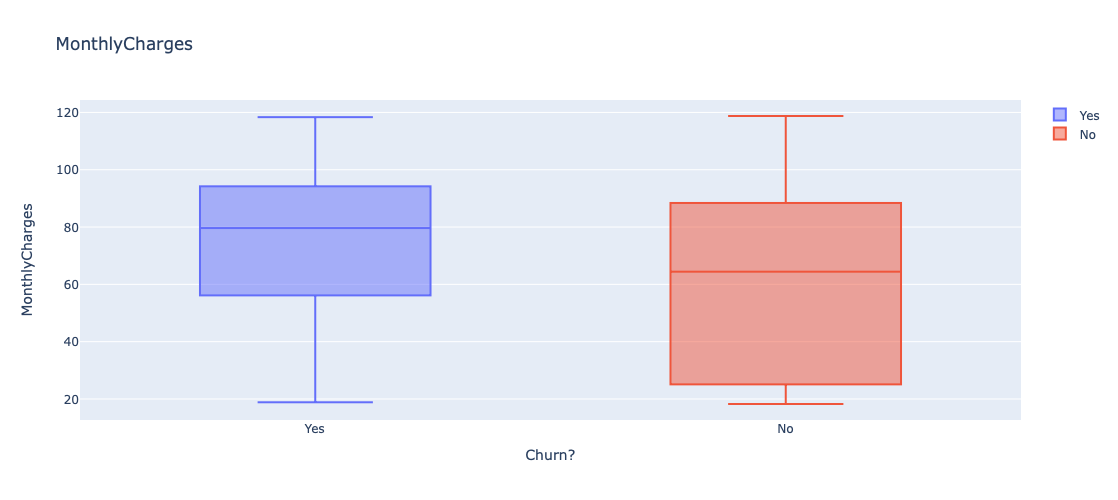

In [41]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'MonthlyCharges'],
            name = churn
        )
    )

layout = go.Layout(
    title = "MonthlyCharges",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "MonthlyCharges"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

<h3>EDA: Target</h3>

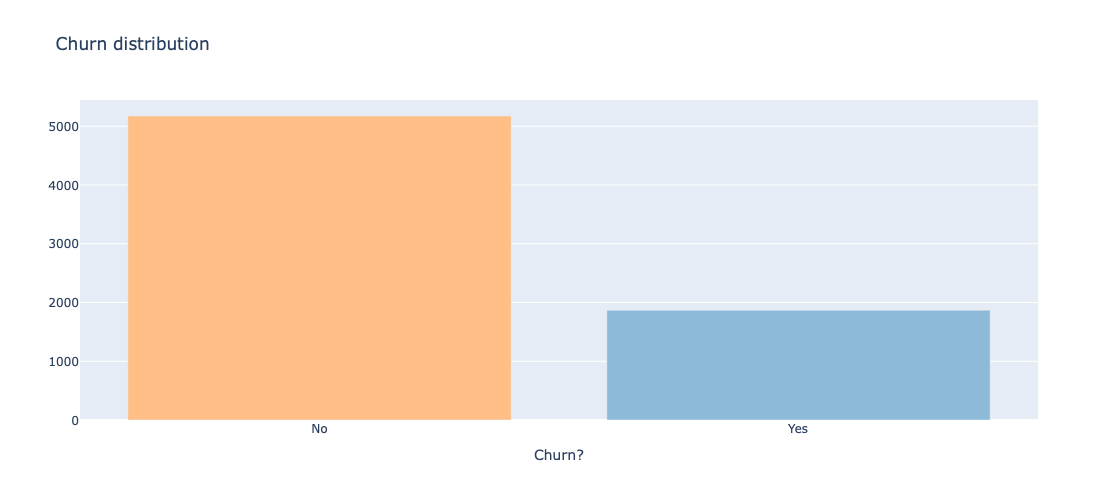

In [42]:
_ = df.groupby('Churn').size().reset_index()

data = [go.Bar(
    x = _['Churn'].tolist(),
    y = _[0].tolist(),
    marker=dict(
        color=['rgba(255,190,134,1)', 'rgba(142,186,217,1)'])
)]

layout = go.Layout(
    title = "Churn distribution",
    xaxis = {"title" : "Churn?"},
    width=800,
    height=500
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Insights нашого простого EDA:<br>
* Ми бачимо різницю між нашими цільовими класами, як ви бачите на першій діаграмі, що добре, оскільки наша модель (логістична регресія) може використовувати це для розділення двох класів.
* Існує також невелика різниця між нашими цільовими класами щодо щомісячних платежів, як показано на другому графіку.
* Наведена вище гістограма показує величезний дисбаланс у наших цільових класах, це може вплинути на прогноз нашої моделі.

<h3>Logistic Regression</h3>

Перш ніж почати прогнозувати, важливий крок — це перетворити нашу функцію **Churn**, яка є рядком, у ціле число. *Так* буде перетворено на 1, а *Ні* — на 0. Ми назвемо ці нові стовпці `class`.

In [44]:
# Створення стовпця 'class' на основі стовпця 'Churn'.
# Якщо значення в стовпці 'Churn' дорівнює 'Yes', то в стовпець 'class' записується 1, інакше - 0.
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

# Визначення ознак, які будуть використовуватися як X, та цільової змінної, яка буде використовуватися як y.
# В ознаках будуть збережені стовпці 'tenure' та 'MonthlyCharges'.
X = df[['tenure','MonthlyCharges']].copy()
X2 = df[['tenure','MonthlyCharges']].copy()  # Збереження копії ознак X в змінну X2 (це може бути зайвим)
y = df['class'].copy()                       # Збереження цільової змінної в змінну y

Давайте спробуємо мінімізувати першу модель за допомогою градієнтного спуску та обчислимо точність нашої моделі.

In [45]:
start_time = time.time()

num_iter = 100_000  # Кількість ітерацій навчання

intercept = np.ones((X.shape[0], 1))  # Створюємо стовпець з одиницями для обчислення зсуву (intercept)
X = np.concatenate((intercept, X), axis=1)  # Додаємо зсув до матриці ознак X
theta = np.zeros(X.shape[1])  # Ініціалізуємо ваги моделі theta з нулями

for i in tqdm(range(num_iter)):
    h = sigmoid(X, theta)  # Обчислюємо прогнозовані значення за допомогою сигмоїдної функції
    gradient = gradient_descent(X, h, y)  # Обчислюємо градієнт за допомогою градієнтного спуску
    theta = update_weight_loss(theta, 0.1, gradient)  # Оновлюємо ваги моделі за допомогою функції втрат та швидкості навчання

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")  # Виводимо час навчання моделі
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))  # Виводимо швидкість навчання та кількість ітерацій

100%|███████████████████████████████████████████| 100000/100000 [00:54<00:00, 1842.28it/s]


Training time (Log Reg using Gradient descent):54.31832194328308 seconds
Learning rate: 0.1
Iteration: 100000


In [46]:
result = sigmoid(X, theta)

In [47]:
result

array([1.83753441e-022, 1.30130210e-066, 7.33979810e-033, ...,
       1.56086880e-032, 6.29348859e-043, 3.45030595e-118])

In [48]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)  # Створюємо DataFrame, в якому зберігаються прогнозовані значення та реальні значення
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)  # Застосовуємо поріг 0.5 до прогнозованих значень для класифікації
accuracy = f.loc[f['pred']==f['class']].shape[0] / f.shape[0] * 100  # Обчислюємо точність моделі (відсоток правильно класифікованих прикладів)
print("Accuracy (Loss minimization):", accuracy)  # Виводимо точність моделі

Accuracy (Loss minimization): 73.4630129206304


Тепер давайте спробуємо оцінити максимальну ймовірність і обчислимо точність

In [49]:
start_time = time.time()  # Запам'ятовуємо початковий час для вимірювання часу навчання

num_iter = 100_000  # Кількість ітерацій навчання

intercept2 = np.ones((X2.shape[0], 1))  # Створюємо стовпець з одиницями для обчислення зсуву (intercept)
X2 = np.concatenate((intercept2, X2), axis=1)  # Додаємо зсув до матриці ознак X2
theta2 = np.zeros(X2.shape[1])  # Ініціалізуємо ваги моделі theta2 з нулями

for i in tqdm(range(num_iter)):
    h2 = sigmoid(X2, theta2)  # Обчислюємо прогнозовані значення за допомогою сигмоїдної функції
    gradient2 = gradient_ascent(X2, h2, y)  # Обчислюємо градієнт за допомогою методу максимальної правдоподібності
    theta2 = update_weight_mle(theta2, 0.1, gradient2)  # Оновлюємо ваги моделі за допомогою градієнтного підйому
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + " seconds")  # Виводимо час навчання моделі
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))  # Виводимо швидкість навчання та кількість ітерацій

100%|███████████████████████████████████████████| 100000/100000 [00:47<00:00, 2098.51it/s]

Training time (Log Reg using MLE):47.66985321044922 seconds
Learning rate: 0.1
Iteration: 100000


In [50]:
result2 = sigmoid(X2, theta2)

In [51]:
print("Accuracy (Maximum Likelihood Estimation):")  # Виводимо заголовок для точності моделі, отриманої за допомогою методу максимальної правдоподібності
f2 = pd.DataFrame(result2).join(y)  # Створюємо DataFrame, в якому зберігаються прогнозовані значення та реальні значення цільової змінної
accuracy2 = f2.loc[f2[0]==f2['class']].shape[0] / f2.shape[0] * 100  # Обчислюємо точність моделі (відсоток правильно класифікованих прикладів)
print(accuracy2)  # Виводимо точність моделі

Accuracy (Maximum Likelihood Estimation):
73.4630129206304


Далі спробуємо використати модуль LogisticRegression від sklearn

In [59]:
from sklearn.linear_model import LogisticRegression  # Імпорт класу LogisticRegression з бібліотеки Scikit-learn

In [60]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [145]:
X = df[['tenure','MonthlyCharges']]

In [146]:
X

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [147]:
y = df['class']

In [148]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: class, Length: 7043, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 2), (2113, 2), (4930,), (2113,))

In [152]:
start_time = time.time()

clf = LogisticRegression(fit_intercept=True, max_iter=100_000)  # Створення екземпляру класу LogisticRegression з параметрами
clf.fit(X_train, y_train)                                                     # Навчання моделі за допомогою методу fit

print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")  # Вивід часу навчання моделі
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))                                             # Вивід швидкості навчання та кількості ітерацій

Training time (sklearn's LogisticRegression module):0.03859281539916992 seconds
Learning rate: 0.1
Iteration: 100000


In [153]:
result_for_train = clf.predict(X_train)
result_for_test = clf.predict(X_test)

In [154]:
# result3 = clf.predict(df[['tenure','MonthlyCharges']])

In [155]:
# result3

In [156]:
result_for_train.shape, result_for_test.shape

((4930,), (2113,))

In [157]:
print("Accuracy (sklearn's Logistic Regression):")  # Виводимо заголовок для точності моделі, навченої за допомогою LogisticRegression з бібліотеки Scikit-learn
train_df = pd.DataFrame(result_for_train).join(y_train)  # Створюємо DataFrame, в якому зберігаються прогнозовані значення та реальні значення цільової змінної
accuracy_train = train_df.loc[train_df[0]==train_df['class']].shape[0] / train_df.shape[0] * 100  # Обчислюємо точність моделі (відсоток правильно класифікованих прикладів)
print(accuracy_train)  # Виводимо точність моделі

Accuracy (sklearn's Logistic Regression):
45.436105476673426


In [158]:
print("Accuracy (sklearn's Logistic Regression):")  # Виводимо заголовок для точності моделі, навченої за допомогою LogisticRegression з бібліотеки Scikit-learn
test_df = pd.DataFrame(result_for_test).join(y_test)  # Створюємо DataFrame, в якому зберігаються прогнозовані значення та реальні значення цільової змінної
accuracy_test= test_df.loc[test_df[0]==test_df['class']].shape[0] / test_df.shape[0] * 100  # Обчислюємо точність моделі (відсоток правильно класифікованих прикладів)
print(accuracy_test)  # Виводимо точність моделі

Accuracy (sklearn's Logistic Regression):
20.160908660672032


In [159]:
print("Accuracy (sklearn's Logistic Regression):")  # Виводимо заголовок для точності моделі, навченої за допомогою LogisticRegression з бібліотеки Scikit-learn
f3 = pd.DataFrame(result3).join(y)  # Створюємо DataFrame, в якому зберігаються прогнозовані значення та реальні значення цільової змінної
accuracy3 = f3.loc[f3[0]==f3['class']].shape[0] / f3.shape[0] * 100  # Обчислюємо точність моделі (відсоток правильно класифікованих прикладів)
print(accuracy3)  # Виводимо точність моделі

Accuracy (sklearn's Logistic Regression):
78.46088314638648


Insights з навчання, передбачення та простого оцінювання, яке ми зробили: <br>
Ми досягли нашої мети, яка полягає в реалізації логістичної регресії без допомоги вбудованих бібліотек (за винятком numpy, звичайно). <br>
Ми передбачили та обчислили точність трьох різних моделей
1. Log Regression з нуля з використанням мінімізації втрат.
1. Log Regression з нуля, використовуючи оцінку максимальної правдоподібності.
1. Клас Log Regression sklearn.